In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [64]:
data = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recoveries = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
deaths = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,410,411,413,414,414,418,418,422,426,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,102,119,120,124


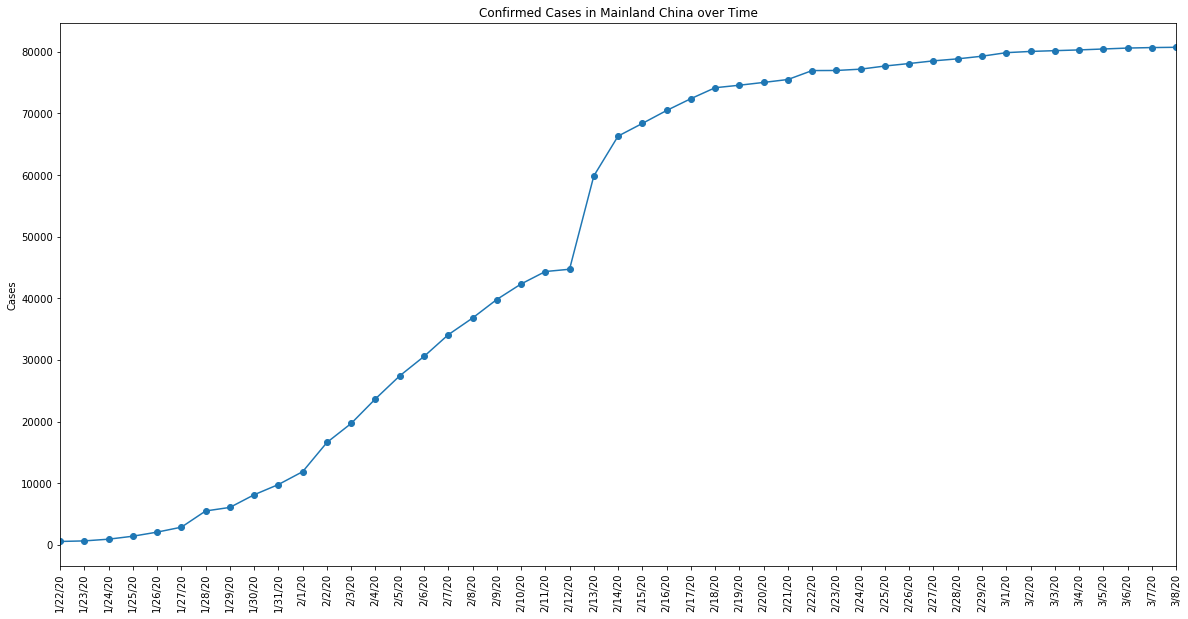

In [53]:
mainlandChina_cases = data.groupby(data['Country/Region'] == 'Mainland China').sum().iloc[1,2:]

x_axis_China = np.arange(len(mainlandChina_cases))
tick_locations_China = [value for value in x_axis_China]
ticks = [x for x in US_cases.index]

plt.figure(figsize=(20,10))
mainlandChina_cases.plot(marker = 'o')
plt.xticks(tick_locations_China,ticks, rotation="vertical")
plt.title("Confirmed Cases in Mainland China over Time")
plt.ylabel("Cases")
plt.show()

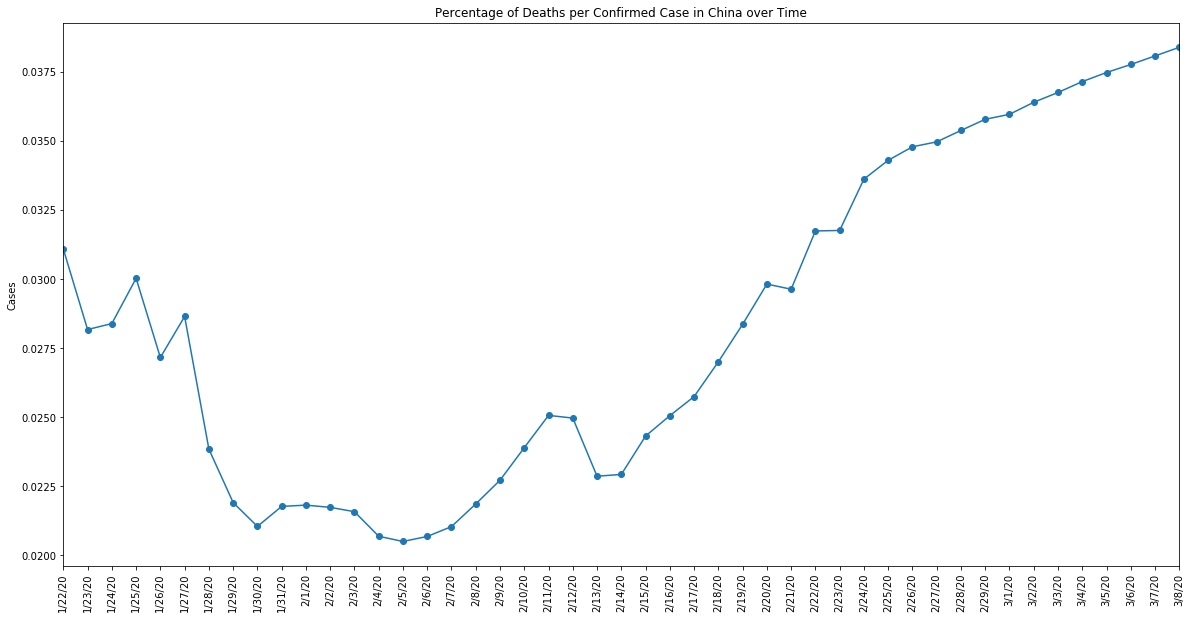

In [54]:
mainlandChina_deaths = deaths.groupby(data['Country/Region'] == 'Mainland China').sum().iloc[1,2:]
mainlandChina_death_pct = mainlandChina_deaths.divide(mainlandChina_cases, fill_value = 0)

x_axis_Cd = np.arange(len(mainlandChina_death_pct))
tick_locations_Cd = [value for value in x_axis_Cd]
ticks = [x for x in mainlandChina_death_pct.index]

plt.figure(figsize=(20,10))
mainlandChina_death_pct.plot(marker = 'o')
plt.xticks(tick_locations_US,ticks, rotation="vertical")
plt.title("Percentage of Deaths per Confirmed Case in China over Time")
plt.ylabel("Cases")

plt.show()

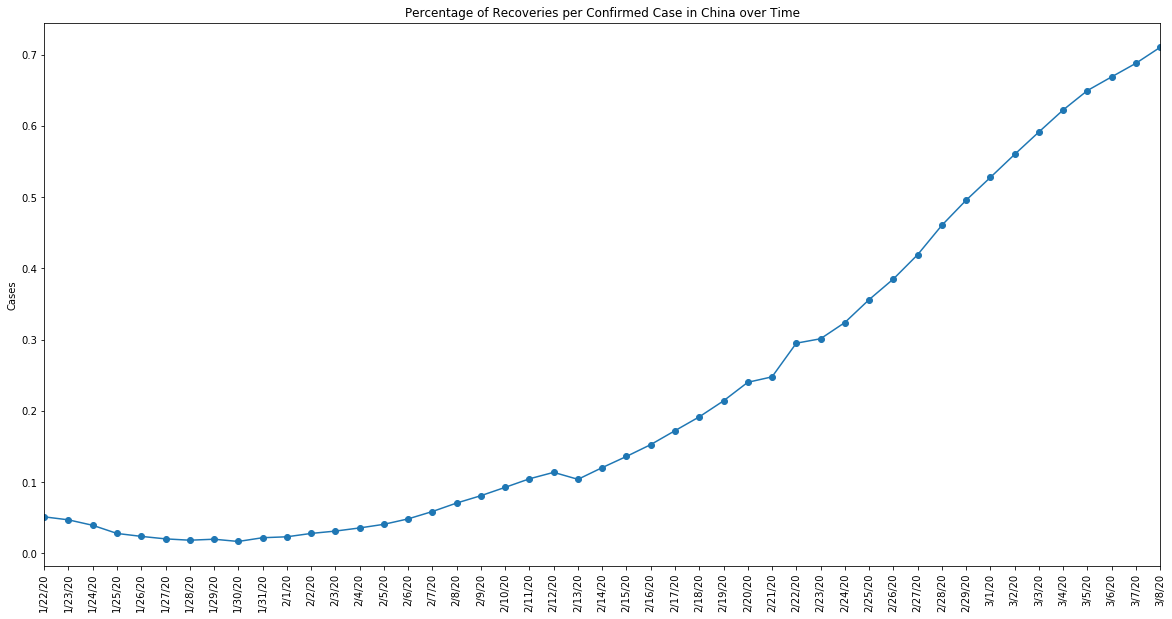

In [55]:
mainlandChina_recover = recoveries.groupby(data['Country/Region'] == 'Mainland China').sum().iloc[1,2:]
mainlandChina_re_pct = mainlandChina_recover.divide(mainlandChina_cases, fill_value = 0)

x_axis_Cr = np.arange(len(mainlandChina_re_pct))
tick_locations_Cr = [value for value in x_axis_Cr]
ticks = [x for x in mainlandChina_re_pct.index]

plt.figure(figsize=(20,10))
mainlandChina_re_pct.plot(marker = 'o')
plt.xticks(tick_locations_Cr,ticks, rotation="vertical")
plt.title("Percentage of Recoveries per Confirmed Case in China over Time")
plt.ylabel("Cases")

plt.show()

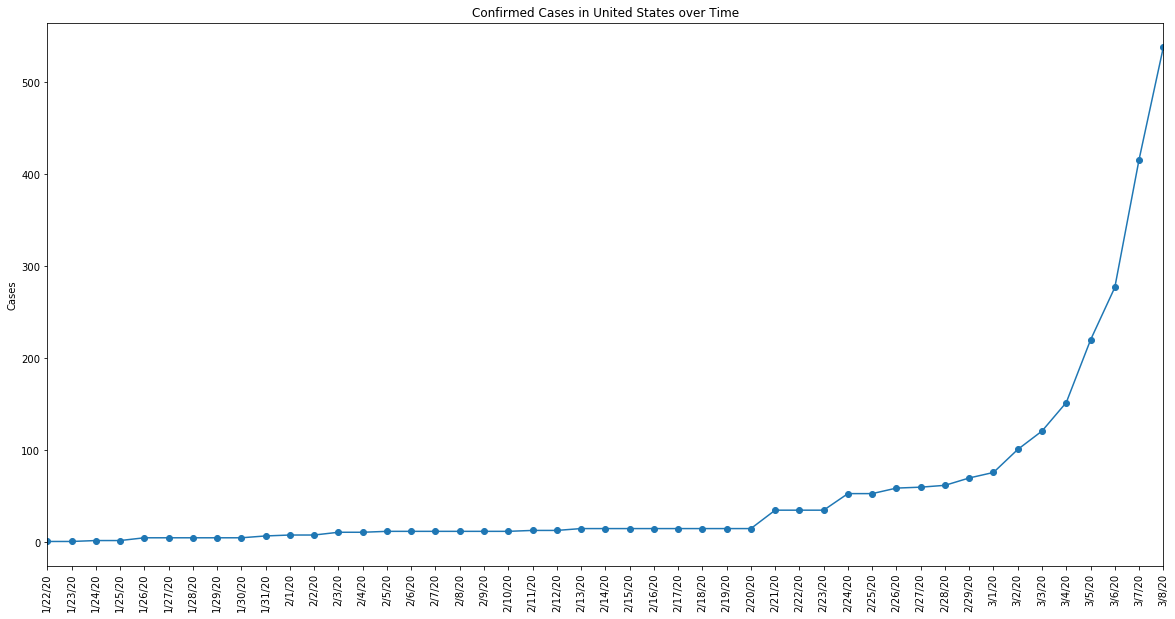

In [52]:
US_cases = data.groupby(data['Country/Region'] == 'US').sum().iloc[1,2:]

x_axis_US = np.arange(len(US_cases))
tick_locations_US = [value for value in x_axis_US]
ticks = [x for x in US_cases.index]

plt.figure(figsize=(20,10))
US_cases.plot(marker = 'o')
plt.xticks(tick_locations_US,ticks, rotation="vertical")
plt.title("Confirmed Cases in United States over Time")
plt.ylabel("Cases")

plt.show()

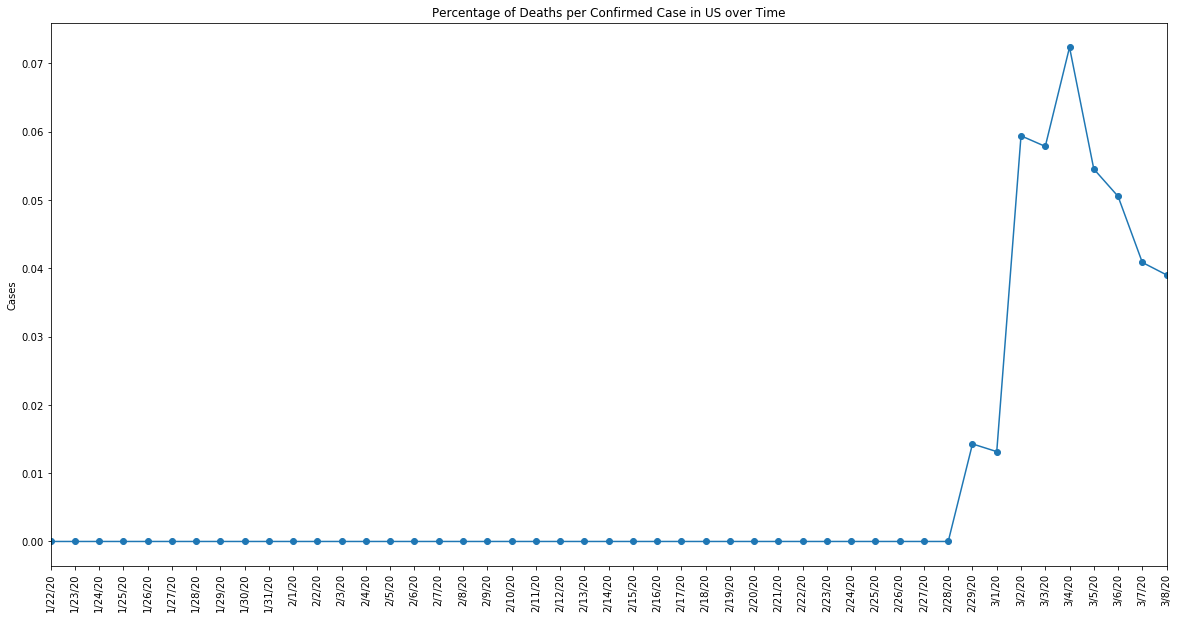

In [59]:
US_deaths = deaths.groupby(data['Country/Region'] == 'US').sum().iloc[1,2:]
US_death_pct = US_deaths.divide(US_cases, fill_value = 0)

x_axis_USd = np.arange(len(US_death_pct))
tick_locations_USd = [value for value in x_axis_USd]
ticks = [x for x in US_death_pct.index]

plt.figure(figsize=(20,10))
US_death_pct.plot(marker = 'o')
plt.xticks(tick_locations_USd,ticks, rotation="vertical")
plt.title("Percentage of Deaths per Confirmed Case in US over Time")
plt.ylabel("Cases")

plt.show()

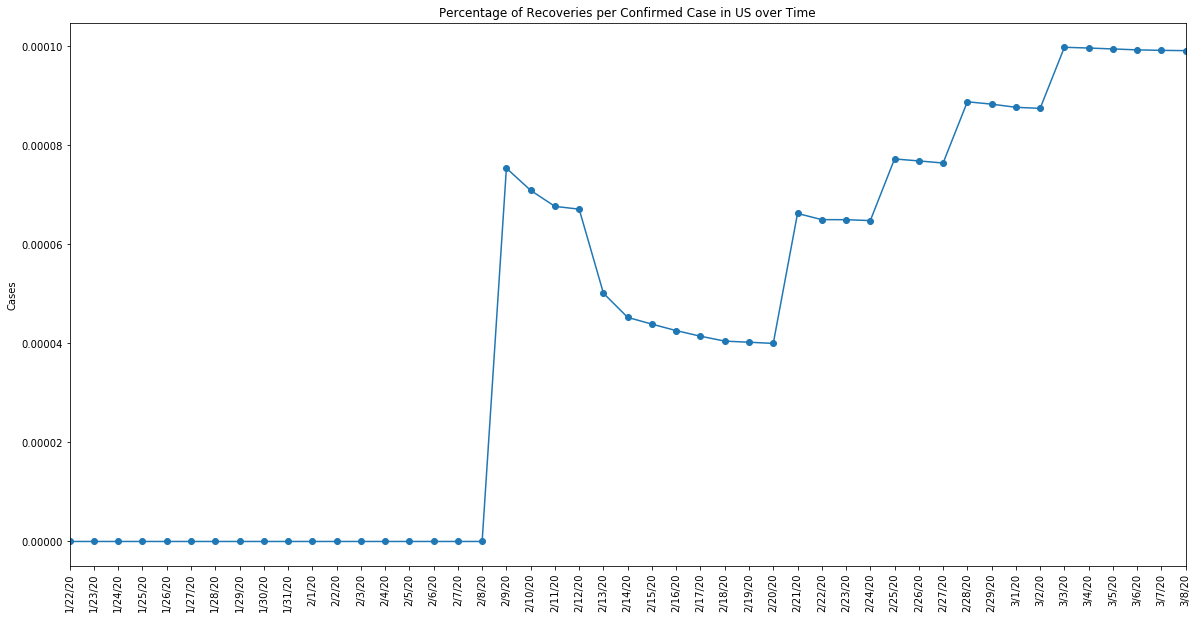

In [69]:
US_recover = recoveries.groupby(data['Country/Region'] == 'US').sum().iloc[1,2:]
US_re_pct = US_recover.divide(mainlandChina_cases, fill_value = 0)

x_axis_USr = np.arange(len(US_re_pct))
tick_locations_USr = [value for value in x_axis_USr]
ticks = [x for x in US_re_pct.index]

plt.figure(figsize=(20,10))
US_re_pct.plot(marker = 'o')
plt.xticks(tick_locations_USr,ticks, rotation="vertical")
plt.title("Percentage of Recoveries per Confirmed Case in US over Time")
plt.ylabel("Cases")

plt.show()

([<matplotlib.axis.XTick at 0x2724a23b128>,
 <a list of 106 Text xticklabel objects>)

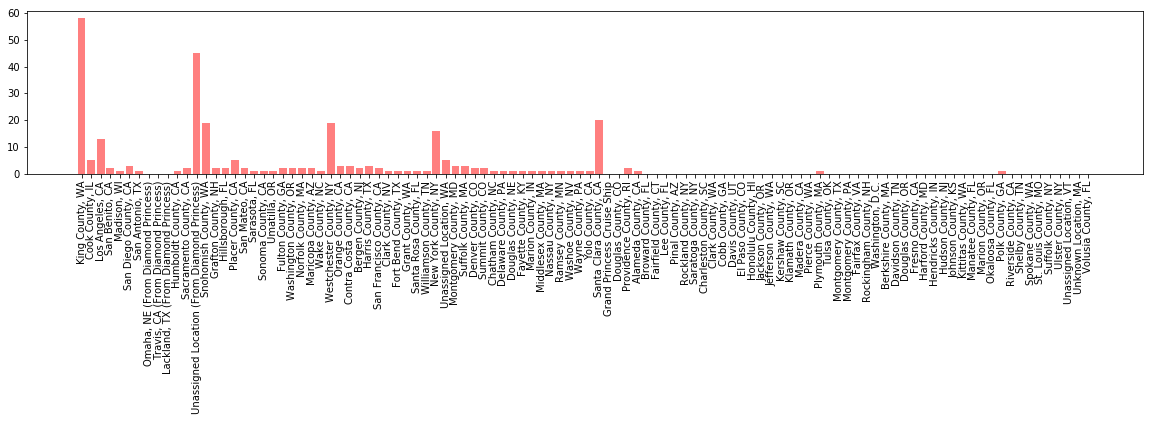

In [75]:
USCases = data[data['Country/Region'] == 'US'].loc[:,['Province/State','3/6/20']].set_index('Province/State')

x_axis = np.arange(len(USCases))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, USCases['3/6/20'] , color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, USCases.index, rotation="vertical")

#plt.figure(figsize=(20,10))
#USCases
#USCases.plot(kind="bar",color="r")
#plt.show()

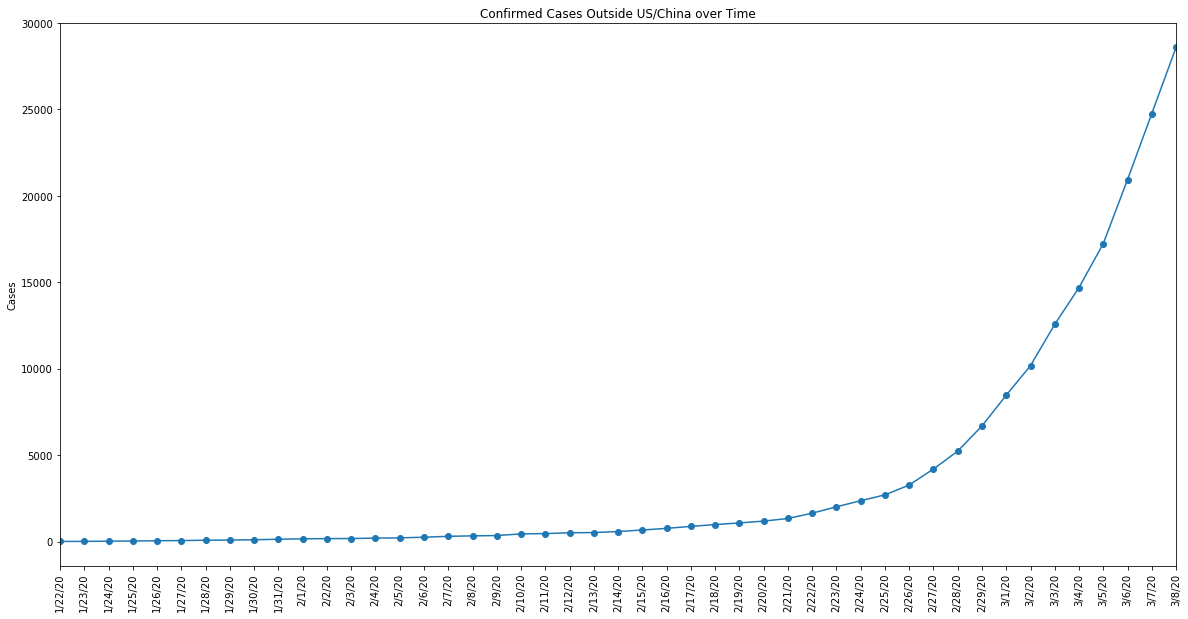

In [79]:
restofWorld_cases = data.groupby((data['Country/Region'] != 'US') & (data['Country/Region']!='Mainland China')).sum().iloc[1,2:]

x_axis_W = np.arange(len(restofWorld_cases))
tick_locations_W = [value for value in x_axis_W]
ticks = [x for x in restofWorld_cases.index]

plt.figure(figsize=(20,10))
restofWorld_cases.plot(marker = 'o')
plt.xticks(tick_locations_W,ticks, rotation="vertical")
plt.title("Confirmed Cases Outside US/China over Time")
plt.ylabel("Cases")
plt.show()


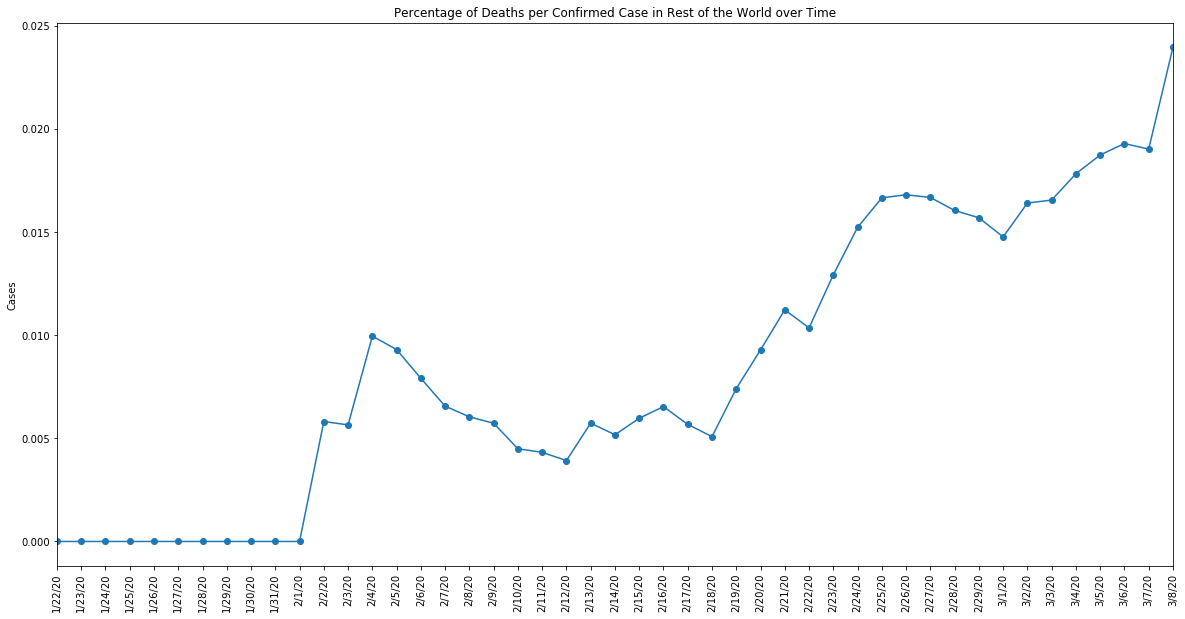

In [77]:
restofWorld_deaths = deaths.groupby((data['Country/Region'] != 'US') & (data['Country/Region']!='Mainland China')).sum().iloc[1,2:]
restofWorld_death_pct = restofWorld_deaths.divide(restofWorld_cases, fill_value = 0)

x_axis_Wd = np.arange(len(restofWorld_death_pct))
tick_locations_Wd = [value for value in x_axis_Wd]
ticks = [x for x in restofWorld_death_pct.index]

plt.figure(figsize=(20,10))
restofWorld_death_pct.plot(marker = 'o')
plt.xticks(tick_locations_Wd,ticks, rotation="vertical")
plt.title("Percentage of Deaths per Confirmed Case in Rest of the World over Time")
plt.ylabel("Cases")

plt.show()

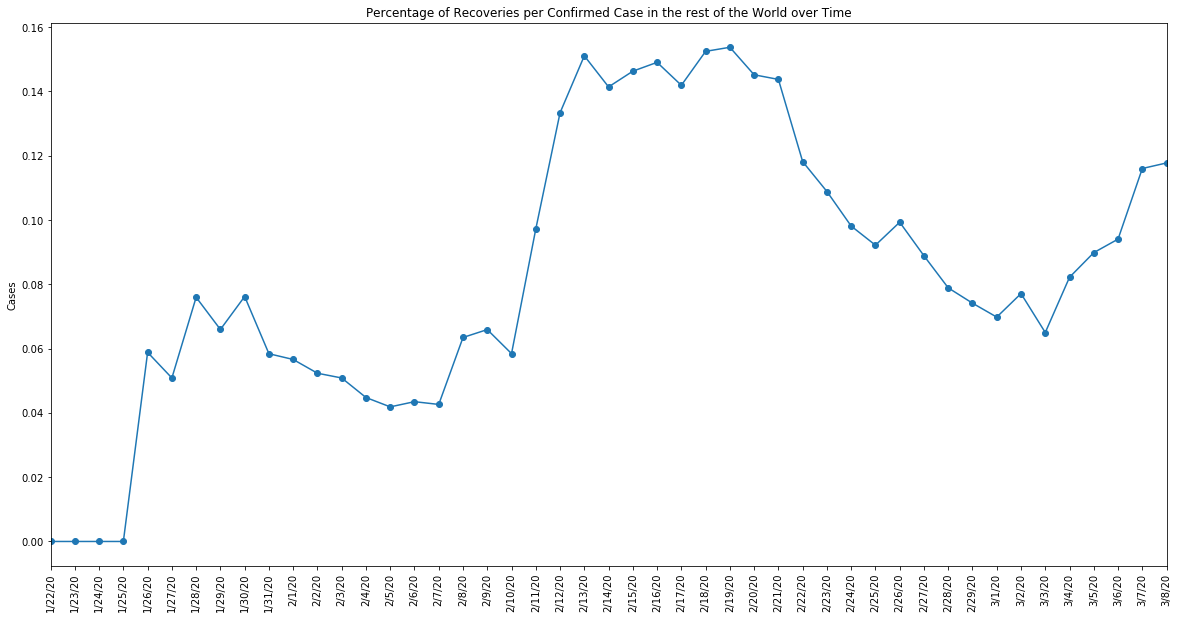

In [80]:
W_recover = recoveries.groupby((data['Country/Region'] != 'US') & (data['Country/Region']!='Mainland China')).sum().iloc[1,2:]
W_re_pct = W_recover.divide(restofWorld_cases, fill_value = 0)

x_axis_Wr = np.arange(len(W_re_pct))
tick_locations_Wr = [value for value in x_axis_Wr]
ticks = [x for x in W_re_pct.index]

plt.figure(figsize=(20,10))
W_re_pct.plot(marker = 'o')
plt.xticks(tick_locations_Wr,ticks, rotation="vertical")
plt.title("Percentage of Recoveries per Confirmed Case in the rest of the World over Time")
plt.ylabel("Cases")

plt.show()